<h1 style = "background-color: white; color : #fe346e; font-size: 40px; font-family:garamond; font-weight: normal; border-radius: 75px 150px; text-align: left"> Python for Machine Learning Visualization Part 05 </h1>

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import plotly.offline as py
from plotly.figure_factory import create_table

import matplotlib.pyplot as plt 
%matplotlib inline 

pd.set_option('display.precision', 2)
sns.set(rc={"axes.facecolor":"Beige" , "axes.grid" : False})
#plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading data
df = pd.read_csv('/kaggle/input/titanic/heart_disease_uci.csv', delimiter = ',', encoding = 'utf-8')
df = df.drop('id',axis =1)
df.head(3)

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1


In [3]:
# handling missing values
df['trestbps'] = df['trestbps'].fillna(round (df['trestbps'].median(), 2))
df.isnull().sum().sum()

1700

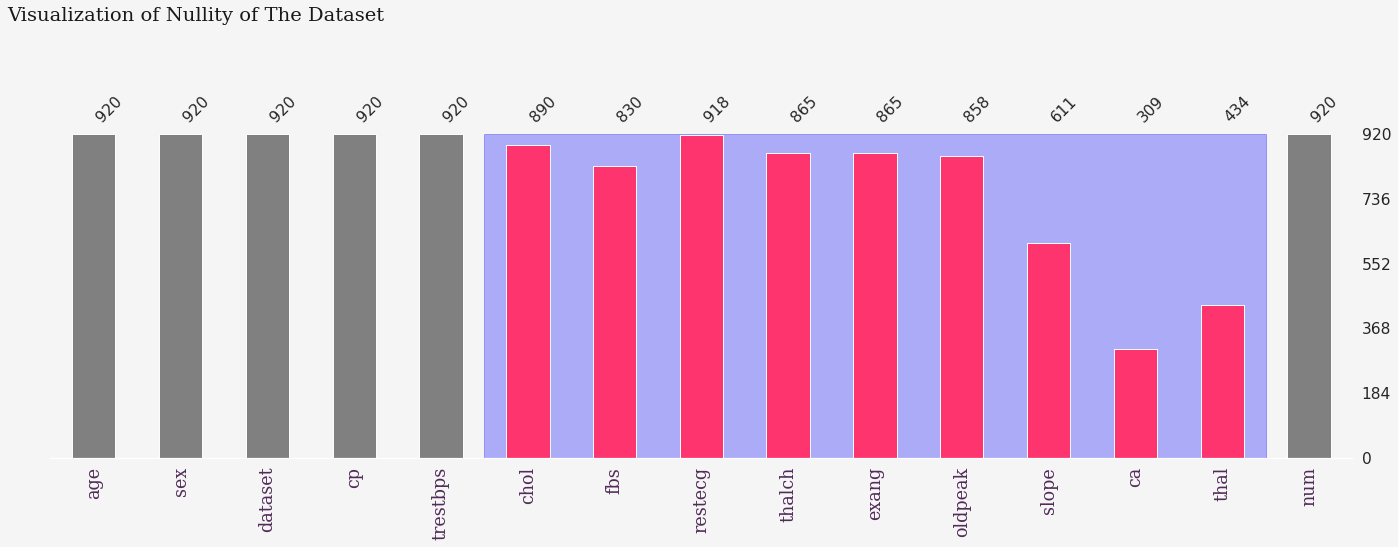

In [4]:
import missingno as msno

missing_cols = df.columns[df.isnull().any()]
color = ['#fe346e' if col in missing_cols else 'grey' for col in df.columns]

fig, ax = plt.subplots(figsize=(24, 6), dpi=70)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

ax.axvspan(xmin = 4.5, xmax = 13.5, color = 'blue',alpha = 0.3)
ax.axvspan(xmin = 14.5, xmax = 15.5, color = 'blue',alpha = 0.3)

msno.bar(df, 
         color=color, 
         ax=ax, fontsize=16)

ax.text(-1, 1.35, 'Visualization of Nullity of The Dataset', 
        {'font': 'Serif', 'color': 'black', 'size': 20}, alpha=0.9)  

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, 
                   ha='center', **{'font': 'Serif', 'weight': 'normal', 'color': '#512b58', 'size': 18}, alpha=1)  
ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)

plt.show()

In [5]:
## binning of numerical variables

df['chol_cat'] = pd.cut(df['chol'], bins = [0, 100, 140 ,160 ,190, 1000], labels = ['Optimal', 'Above_Optimal', 'Borderline', 'High', 'Very_High'])

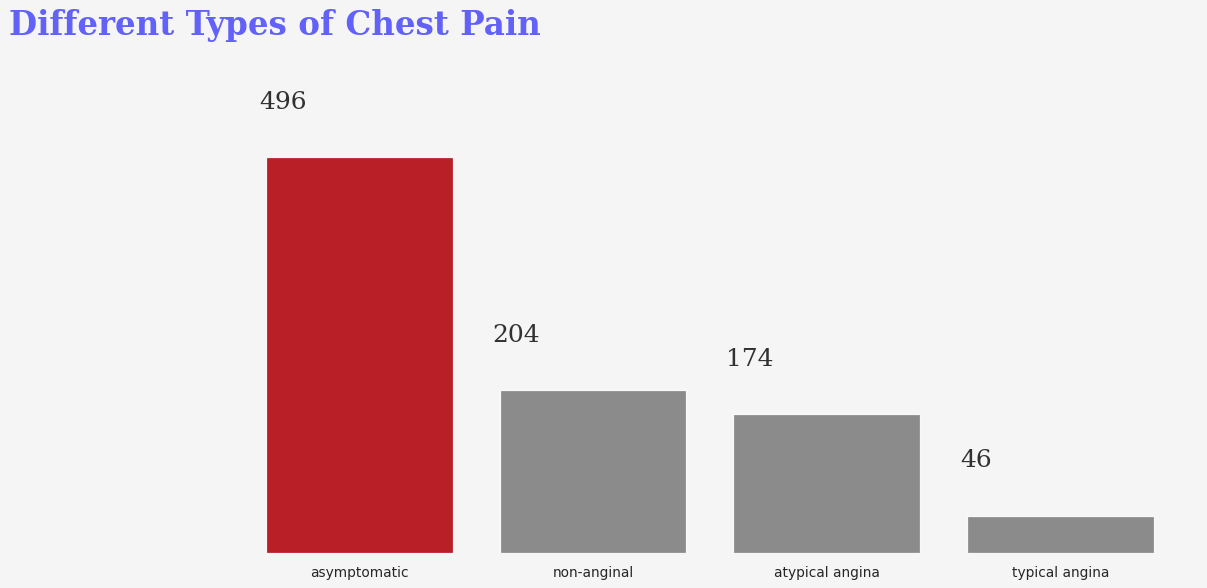

In [6]:
fig, ax = plt.subplots(figsize = (14,6), dpi = 90)
ax.set_facecolor('#f6f5f5')
fig.patch.set_facecolor('#f6f5f5')

a = df['cp'].value_counts()
colors = ['#b20710','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey']
ax.bar(x = a.index, height = a.values, color = colors, alpha = 0.9)

# Create labels
label = a.values.tolist()
 
# Text on the top of each bar
for i in range(len(label)):
    x = i  - 0.35
    y = (i+18)/2 + label[i]
    x = x-0.08
    y = y + 52
    ax.text(x,y, '{}'.format(a.values[i]),{'font': 'serif', 'weight': 'normal', 'color': 'black', 'fontsize': 20}, alpha = 0.8)

#ax.set_xticks(a.values)
ax.text(-1.5, 650 , 'Different Types of Chest Pain', {'font': 'serif', 'color': 'Blue', 'fontsize': 26, 'weight':'bold'},alpha = 0.6 )

for loc in ['left','right','top','bottom']:
    ax.spines[loc].set_visible(False)
    
ax.axes.get_yaxis().set_visible(False)
fig.show()

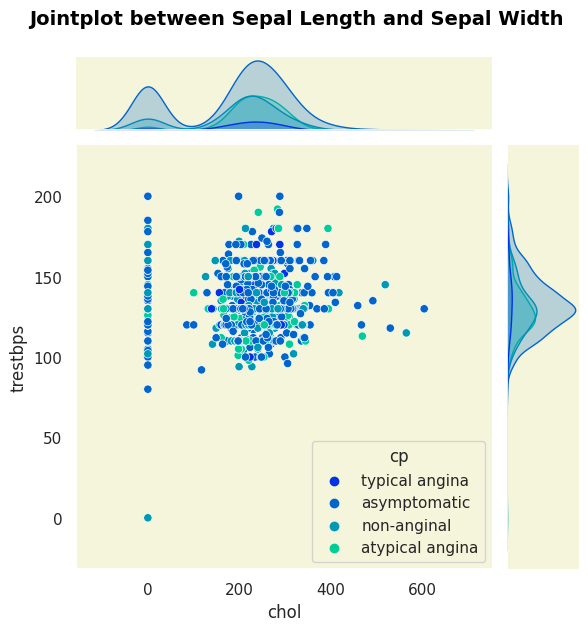

In [7]:
jointplot = sns.jointplot(x = 'chol', y = 'trestbps', data = df, hue = 'cp', palette = 'winter')

jointplot.fig.suptitle('Jointplot between Sepal Length and Sepal Width', fontweight = 'heavy', y = 1.05, fontsize = '14',
                       fontfamily = 'sans-serif', color = "Black");